# Lab Notebook 2

Continuation of lab notebook except now we have the code to generate a dataset. Therefore, in this notebook we begin with our dataset and explore how we can apply learning models to fit our data.

In [181]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from data_fetcher import DataFetcher

In [183]:
# READ IN ALL THREE DATAFRAMES AND JOIN THEM
PATH    = './data/clean/Los_Angeles-North_Main_Street/2018/'

core_df = pd.read_csv(PATH + 'core.csv', index_col='datetime')
vocs_df = pd.read_csv(PATH + 'vocs.csv', index_col='datetime')
emissions_df = pd.read_csv(PATH + 'emissions.csv', index_col='datetime')

In [184]:
# Keep track of performance
metrics = {}

# Running a Random Forest Model on the Core Dataset

In [185]:
core_df.isna().sum()

Carbon monoxide                115
Nitrogen dioxide (NO2)          92
Ozone                          247
PM2.5 - Local Conditions      8415
Wind Direction - Resultant      31
Wind Speed - Resultant          31
Outdoor Temperature             31
Relative Humidity               31
Solar radiation                 28
Ultraviolet radiation           28
Barometric pressure             29
dtype: int64

In [186]:
# We want to drop columns without enough data, these seem to only include PM2.5 - Local Conditions
core_df = core_df.drop(['PM2.5 - Local Conditions'], axis=1)
core_df[core_df['Ozone'].isna()]

,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Solar radiation,Ultraviolet radiation,Barometric pressure
datetime,,,,,,,,,,
2018-01-10 10:00:00,NaN,NaN,NaN,62.0,1.8,59.3,67.0,0.69,0.03,1008.0
2018-01-10 11:00:00,NaN,NaN,NaN,100.0,2.1,61.1,62.0,0.73,0.04,1007.0
2018-01-10 12:00:00,NaN,NaN,NaN,152.0,1.0,62.6,60.0,0.78,0.04,1006.0
2018-01-10 13:00:00,NaN,NaN,NaN,113.0,1.0,64.0,56.0,0.68,0.03,1005.0
2018-01-10 14:00:00,NaN,NaN,NaN,199.0,1.2,65.6,53.0,0.52,0.02,1005.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-07 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
core_df.loc['2018-01-10 00:00:00':'2018-01-11 00:00:00']

,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Solar radiation,Ultraviolet radiation,Barometric pressure
datetime,,,,,,,,,,
2018-01-10 00:00:00,0.8,26.7,0.001,41.0,3.8,50.7,96.0,0.00,0.00,1002.0
2018-01-10 01:00:00,0.8,26.7,0.001,37.0,4.3,50.1,97.0,0.00,0.00,1002.0
2018-01-10 02:00:00,0.7,25.3,0.001,33.0,3.5,49.7,97.0,0.00,0.00,1003.0
2018-01-10 03:00:00,0.6,23.7,0.001,36.0,4.7,48.8,97.0,0.00,0.00,1003.0
2018-01-10 04:00:00,0.6,23.0,0.001,34.0,3.9,49.0,96.0,0.00,0.00,1003.0
2018-01-10 05:00:00,0.7,24.1,0.001,35.0,3.7,49.2,94.0,0.00,0.00,1004.0
2018-01-10 06:00:00,0.9,25.4,0.001,34.0,5.6,49.1,93.0,0.00,0.00,1005.0
2018-01-10 07:00:00,1.0,26.4,0.001,41.0,4.2,49.7,91.0,0.03,0.00,1005.0
2018-01-10 08:00:00,1.0,26.1,0.003,31.0,5.4,52.2,84.0,0.29,0.01,1006.0


### Forward fill missing values

Most common method to fill missing data for timeseries problems is with a forward fill, so let's use this on our dataframe.

In [188]:
core_df = core_df.ffill()
core_df.isna().sum()

Carbon monoxide               0
Nitrogen dioxide (NO2)        0
Ozone                         0
Wind Direction - Resultant    0
Wind Speed - Resultant        0
Outdoor Temperature           0
Relative Humidity             0
Solar radiation               0
Ultraviolet radiation         0
Barometric pressure           0
dtype: int64

### Run the random forest

In [189]:
y = core_df['Ozone'].to_numpy()
X = core_df.drop(['Ozone'], axis=1).to_numpy()

print(y.shape)
print(X.shape)

(8760,)
(8760, 9)


In [190]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
(X == np.concatenate((X_train, X_test), axis=0)).sum() == (X.shape[0] * X.shape[1])
(y == np.concatenate((y_train, y_test), axis=0)).sum() == (y.shape[0])

# dates_train, dates_test = core_df.index[:X_train.shape[0]], core_df.index[X_train.shape[0]:]

True

In [191]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
metrics['core'] = score
print(f"Preliminary Sum of squares error: {score}")
y_pred = rf.predict(X_test)

Preliminary Sum of squares error: 0.795876680219179


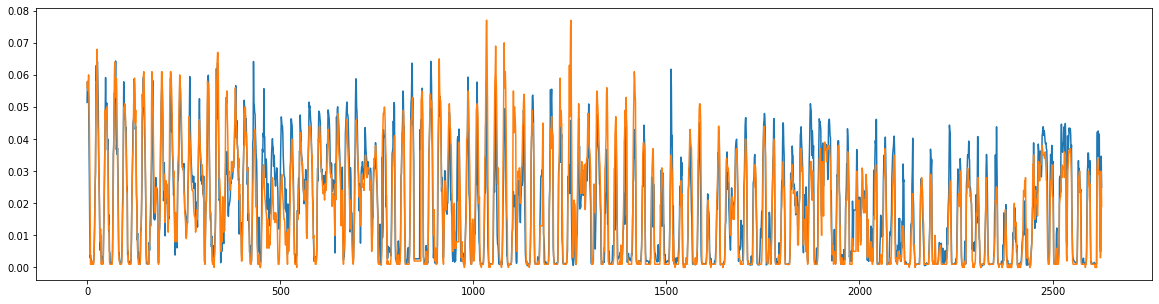

In [192]:
# Plot predictions
f, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y_pred)
ax.plot(y_test)
plt.show()

## TODO

We want to:
* Better label our plot above (I am having trouble with matplotlib)
* Find a better performance metric than squared error
* Use interpolate instead of ffill and drop times with too much missing data
* Date and Time should still be features

# Running RF with VOC data

Let's add the VOC data to our dataset. First we need to clean it.

In [193]:
print(vocs_df.shape)
vocs_df.isna().sum()

(8641, 40)


1,2,3-Trimethylbenzene    8587
1,2,4-Trimethylbenzene    8583
1,3,5-Trimethylbenzene    8583
1-Butene                  8583
1-Pentene                 8583
2,2,4-Trimethylpentane    8583
2,2-Dimethylbutane        8583
2,3,4-Trimethylpentane    8583
2,3-Dimethylbutane        8583
2,3-Dimethylpentane       8583
2-Methylheptane           8583
2-Methylhexane            8583
2-Methylpentane           8583
3-Methylheptane           8583
3-Methylhexane            8583
3-Methylpentane           8583
Acetaldehyde              8607
Acetylene                 8583
Benzene                   8586
Cyclohexane               8583
Cyclopentane              8583
Ethane                    8583
Ethylene                  8583
Formaldehyde              8607
Isobutane                 8583
Isopentane                8583
Methylcyclohexane         8583
Methylcyclopentane        8583
Propane                   8587
Propylene                 8583
Toluene                   8586
cis-2-Butene              8583
n-Butane

In [194]:
# Similarly to core_df, forward fill the NaNs in VOCs data
vocs_df = vocs_df.ffill()
vocs_df.isna().sum().sum()

0

In [195]:
# There is some problem in datafetcher code that drops the first day of measurements (2018-01-01) for VOC data
# We need to fix this but for now I will just drop the first day from core_df
# Similar problem for the last few days
# What we should actually do is bfill and ffill the first day and last few days respectively
print(core_df.shape)
print(vocs_df.shape)
# NOTE: The inner join will simply drop missing days in VOCs data from core data
core_n_vocs_df = core_df.join([vocs_df], how='inner')
print(core_n_vocs_df.shape)

(8760, 10)
(8641, 40)
(8641, 50)


In [196]:
y = core_n_vocs_df['Ozone'].to_numpy()
X = core_n_vocs_df.drop(['Ozone'], axis=1).to_numpy()

In [197]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
(X == np.concatenate((X_train, X_test), axis=0)).sum() == (X.shape[0] * X.shape[1])
print((y == np.concatenate((y_train, y_test), axis=0)).sum() == (y.shape[0]))

True


In [198]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
metrics['core & vocs'] = score
print(f"Preliminary Sum of squares error: {score}")
y_pred = rf.predict(X_test)

Preliminary Sum of squares error: 0.8069198135034423


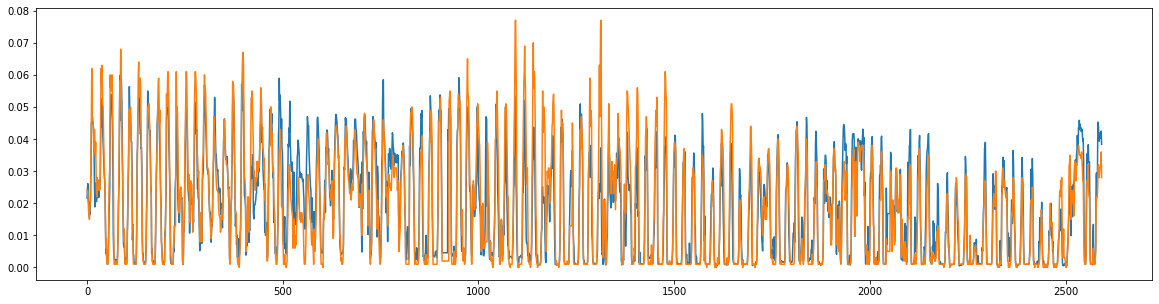

In [199]:
# Plot predictions
f, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y_pred)
ax.plot(y_test)
plt.show()

In [200]:
metrics

{'core': 0.795876680219179, 'core & vocs': 0.8069198135034423}

# Now Run RF with Emissions, no VOCs

In [201]:
emissions_df.isna().sum()

ALD2             0
ALK4_butanes     0
ALK4_hexanes     0
ALK4_pentanes    0
BENZ             0
BUTENE           0
C2H2             0
C2H4             0
C2H6             0
C3H8             0
CH2O             0
PRPE             0
TMB              0
TOLU             0
XYLE             0
dtype: int64

In [202]:
# Add emissions suffix to emissions column names
emissions_df.columns = [x + '_emissions' for x in emissions_df.columns]

In [205]:
core_n_emissions_df = core_df.join([emissions_df], how='inner')
core_n_emissions_df.shape

(8760, 25)

In [206]:
y = core_n_emissions_df['Ozone'].to_numpy()
X = core_n_emissions_df.drop(['Ozone'], axis=1).to_numpy()

print(y.shape)
print(X.shape)

(8760,)
(8760, 24)


In [207]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
(X == np.concatenate((X_train, X_test), axis=0)).sum() == (X.shape[0] * X.shape[1])
print((y == np.concatenate((y_train, y_test), axis=0)).sum() == (y.shape[0]))

True


In [208]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
metrics['core & emissions'] = score
print(f"Preliminary Sum of squares error: {score}")
y_pred = rf.predict(X_test)

Preliminary Sum of squares error: 0.7972792486158458


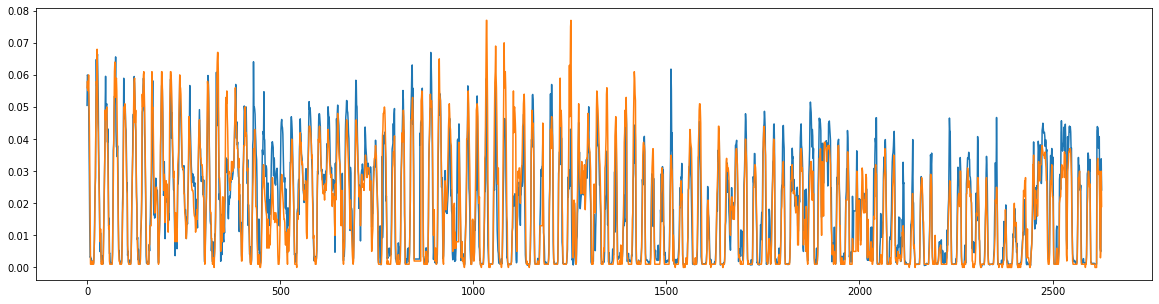

In [209]:
# Plot predictions
f, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y_pred)
ax.plot(y_test)
plt.show()

In [210]:
metrics

{'core': 0.795876680219179,
 'core & vocs': 0.8069198135034423,
 'core & emissions': 0.7972792486158458}

## Preliminary Conclusions

Notice thee score of running our algorithm is similar even if we add/remove vocs/emissions from our training set. This implies the Random Forest negligibly relies of VOC and emissions data; the most important information that RF nodes use to partition data lie within the core dataframe, not the vocs or emissions df. 

We could remedy this using feature selection and hyperparameter tuning. By pruning the VOCs feature space we could allow the RF to focus more on the VOCs that matter (and for which we have better data), similarly for emissions. Furthermore, increasing the complexity of our model might allow it to learn more from these two datasets, at the risk of overfitting.